In [2]:
import pandas as pd
import numpy as np

In [3]:
veh = pd.read_csv('vehicle.csv', low_memory=False)
acc = pd.read_csv('accident.csv')
per = pd.read_csv('person.csv')

In [4]:
acc = acc.drop(['ALCHL_IM','ALCHL_IMNAME','NO_INJ_IMNAME','NO_INJ_IM','MAXSEV_IM',
                              'WEATHR_IMNAME','RELJCT2_IMNAME', 'WEATHR_IM','LGTCON_IMNAME','LGTCON_IM',
                              'RELJCT2_IM','MANCOL_IMNAME','MANCOL_IM','EVENT1_IMNAME','EVENT1_IM',
                              'MINUTE_IMNAME','MINUTE_IM','HOUR_IMNAME','HOUR_IM','WKDY_IMNAME',
                              'WKDY_IM','WEIGHT','PSUSTRAT','CF3NAME','CF3',
                              'CF2NAME','CF2','CF1NAME','CF1','INT_HWYNAME',
                              'INT_HWY','SCH_BUSNAME','SCH_BUS','WEATHER1NAME','WEATHER1',
                              'WEATHER2NAME','WEATHER2','REL_ROADNAME','REL_ROAD','WRK_ZONENAME',
                              'WRK_ZONE','RELJCT2NAME','RELJCT2','RELJCT1NAME','RELJCT1',
                              'MAN_COLLNAME','MAN_COLL','HARM_EV','HARM_EVNAME','MINUTENAME',
                              'MINUTE','HOURNAME','DAY_WEEKNAME','YEARNAME','YEAR',
                              'MONTHNAME','NUM_INJNAME','PERNOTMVIT','PVH_INVL','VE_FORMS',
                              'PSU_VAR','PJ','PSU'],axis=1)
per = per.drop(per[per['SEAT_POS']!=11].index)
per = per.drop_duplicates(subset='CASENUM', keep = 'first')

In [5]:
def Intersection(lst1, lst2):
    return list(set(lst1).intersection(lst2))

In [6]:
inter = Intersection(per.columns.tolist(), acc.columns.tolist())

In [7]:
per_acc = pd.merge(acc, per, on = inter)

In [8]:
inter = Intersection(per.columns.tolist(), veh.columns.tolist())
per_acc_veh = pd.merge(per_acc, veh, on = inter)

In [9]:
per_acc_veh = per_acc_veh.drop([
          "VSPD_LIMNAME", "VSPD_LIM", "STRATUM", "VNUM_LANNAME", "VNUM_LAN", "TRAV_SP",
          "TRAV_SPNAME", "DEFORMED", "DEFORMEDNAME", "VALIGN", "VALIGNNAME",
          "VTRAFCONNAME", "VTRAFCON", "V_ALCH_IMNAME", "V_ALCH_IM", "NUMINJ_IMNAME",
          "NUMINJ_IM", "VEVENT_IMNAME", "MXVSEV_IMNAME", "MXVSEV_IM", "PCRASH1_IMNAME",
          "PCRASH1_IM", "VEVENT_IM", "IMPACT1_IMNAME", "IMPACT1_IM", "MDLYR_IMNAME",
          "MDLYR_IM", "BDYTYP_IMNAME", "BDYTYP_IM", "HITRUN_IMNAME", "HITRUN_IM",
          "ACC_TYPE", "ACC_TYPENAME", "TRLR3VINNAME","TRLR3VIN", "TRLR2VINNAME",
          "TRLR2VIN", "TRLR1VINNAME", "TRLR1VIN", "P_CRASH2NAME", "P_CRASH2",
          "P_CRASH1NAME", "P_CRASH1", "PCRASH5NAME", "PCRASH5", "PCRASH4NAME",
          "PCRASH4", "P_CRASH3NAME", "P_CRASH3", "VTCONT_FNAME", "VTCONT_F",
          "VPROFILENAME", "VPROFILE", "DR_SF4NAME","DR_SF4", "DR_SF3NAME",
          "DR_SF3", "DR_SF2NAME", "DR_SF2", "DR_SF1NAME", "DR_SF1",
          "DR_ZIPNAME", "DR_ZIP", "ADS_ENGNAME", "ADS_ENG", "ADS_LEVNAME",
          "ADS_LEV", "ADS_PRESNAME", "ADS_PRES", "DR_PRESNAME", "DR_PRES",
          "VEH_SC2NAME", "VEH_SC2", "VEH_SC1NAME", "VEH_SC1", "NUM_INJVNAME",
          "NUM_INJV", "MAX_VSEVNAME", "MAX_VSEV", "VEH_ALCHNAME", "VEH_ALCH",
          "M_HARMNAME", "M_HARM", "TOWEDNAME", "TOWED", "ROLINLOCNAME",
          "ROLINLOC", "BUS_USENAME", "BUS_USE", "HAZ_RELNAME", "HAZ_REL",
          "HAZ_CNONAME", "HAZ_CNO", "HAZ_IDNAME", "HAZ_ID", "HAZ_PLACNAME",
          "HAZ_PLAC", "HAZ_INVNAME", "HAZ_INV", "CARGO_BTNAME", "CARGO_BT",
          "V_Config", "V_ConfigNAME", "GVWR", "GVWRNAME", "MCARR_IDNAME",
          "MCARR_ID", "MCARR_I2NAME", "MCARR_I2", "MCARR_I1NAME", "MCARR_I1",
          "J_KNIFENAME", "J_KNIFE", "VINNAME", "VIN", "MODEL",
          "HIT_RUNNAME", "UNITTYPE", "NUMOCCSNAME", "NUMOCCS", "UNITTYPENAME",
          "AGE_IMNAME", "AGE_IM", "SEAT_IMNAME", "SEAT_IM", "PERALCH_IMNAME",
          "PERALCH_IM", "EJECT_IMNAME", "EJECT_IM", "INJSEV_IMNAME", "INJSEV_IM",
          "PSUSTRAT", "SEX_IMNAME", "SEX_IM", "WEIGHT", "LOCATIONNAME",
          "LOCATION", "P_SF3NAME", "P_SF3", "P_SF2NAME", "P_SF2", "P_SF1NAME",
          "P_SF1", "HOSPITALNAME", "HOSPITAL", "ALC_RESNAME", "ALC_RES",
          "ATST_TYPNAME", "ATST_TYP", "ALC_STATUS", "ALC_STATUSNAME", "EJECTION",
          "EJECTIONNAME", "REST_MISNAME", "REST_MIS", "HELM_MISNAME", "HELM_MIS",
          "HELM_USENAME", "HELM_USE", "REST_USENAME", "REST_USE", "SEAT_POSNAME",
          "SEAT_POS", "IMPACT1", "IMPACT1NAME", "PER_TYPNAME", "PER_TYP",
          "SEXNAME", "AGENAME", "FIRE_EXPNAME", "FIRE_EXP", "ROLLOVERNAME",
          "ROLLOVER", "EMER_USENAME", "EMER_USE","SPEC_USENAME", "SPEC_USE",
          "TOW_VEHNAME", "TOW_VEH", "MOD_YEARNAME", "MAK_MOD", "MAK_MODNAME",
          "SCH_BUSNAME", "SCH_BUS", "MAN_COLLNAME", "MAX_VSEV", "NUM_INJ",
          "INJ_SEV", "MAN_COLL", "HARM_EVNAME", "HARM_EV", "MINUTENAME", 
          "MINUTE", "HOURNAME", "MONTHNAME", "STR_VEH", "PSU_VAR",
          "PJ", "PSU", "PER_NO", "DRUGS"], axis=1)



In [10]:
[x for x in list(per_acc_veh.columns) if "MAX" in x]

['MAX_SEV', 'MAX_SEVNAME', 'MAXSEV_IMNAME']

In [11]:
per_acc_veh = per_acc_veh.drop(per_acc_veh[per_acc_veh['AGE'] > 100].index)
df = per_acc_veh.drop(per_acc_veh[per_acc_veh['SEX'] > 2].index)



df.reset_index()
L=[]

for i in range(len(df)):
    L.append(df['ALCOHOL'].iloc[i]==1 or df['DRINKING'].iloc[i]==1)

df['SUBSTANCE'] = L
df = df.drop(['ALCOHOL', 'DRINKING'], axis = 1)

NAMES = [x for x in list(df.columns) if "NAME" in x]
raw = df.drop(NAMES, axis = 1)

danger = list(raw['MAX_SEV'])
raw['DANGER_LEVEL'] = danger
raw = raw.drop('MAX_SEV', axis=1)

raw = raw.drop(raw[raw['DANGER_LEVEL'] > 4].index)

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
def splitdataset(data):
  
    # Separating the target variable
    X = data.values[:, 0:-1]
    Y = data.values[:, -1]
  
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.2, random_state = 100)
      
    return X, Y, X_train, X_test, y_train, y_test

In [14]:
def train_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 4)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [15]:
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [16]:
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    
    acc =  accuracy_score(y_test,y_pred)*100
    print ("Accuracy : ", acc)
      
    print("Report : ", classification_report(y_test, y_pred))
    
    return cm, acc

Predicted values:
[1 0 0 ... 0 0 0]
Accuracy :  57.18762636473919
Report :                precision    recall  f1-score   support

           0       0.64      0.94      0.76      4924
           1       0.36      0.23      0.28      2235
           2       0.45      0.28      0.34      1512
           3       0.34      0.10      0.15      1021
           4       0.00      0.00      0.00       200

    accuracy                           0.57      9892
   macro avg       0.36      0.31      0.31      9892
weighted avg       0.50      0.57      0.51      9892



C:\Users\ariel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ariel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ariel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


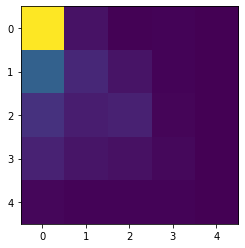

In [17]:
X, Y, X_train, X_test, y_train, y_test = splitdataset(raw)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

model = train_using_entropy(X_train, X_test, y_train)
y_pred = prediction(X_test, model)
cm, acc = cal_accuracy(y_test, y_pred)

plt.imshow(cm)


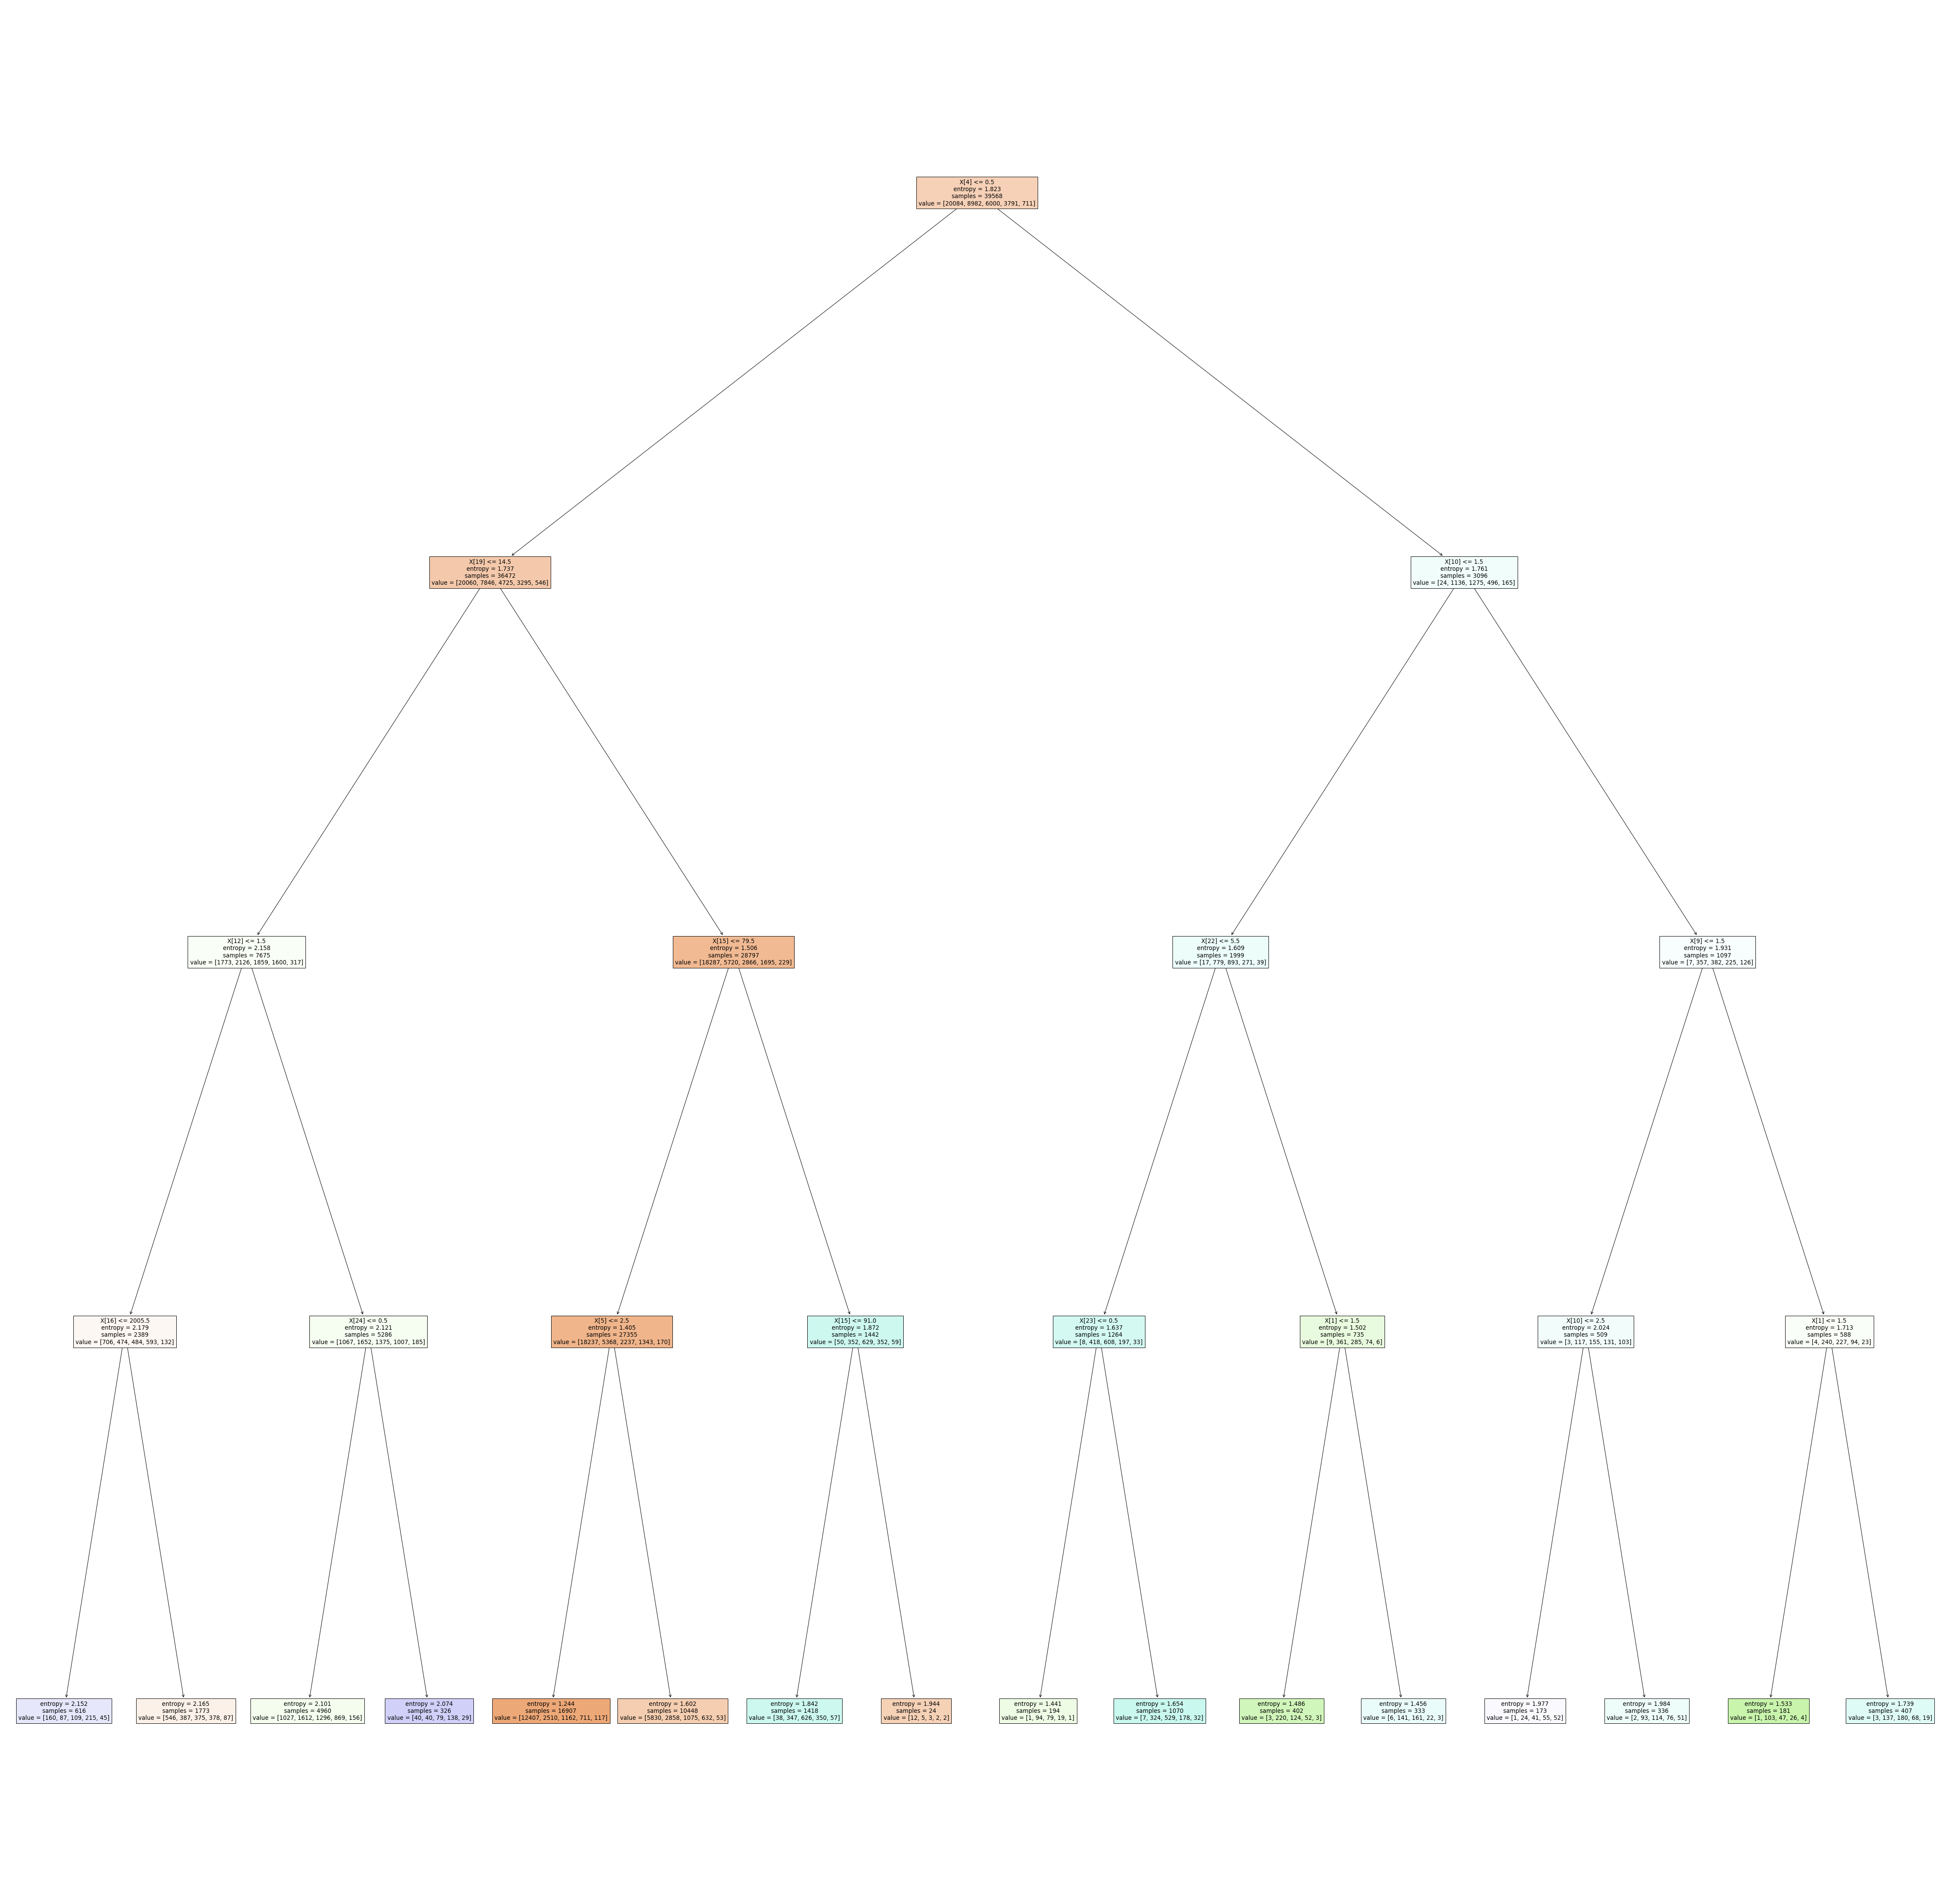

In [18]:
plt.figure(figsize = (80,80))
plot_tree(model, filled = True)
plt.show()

Predicted values:
[1 0 0 ... 2 0 1]
Accuracy :  57.0966437525273
Report :                precision    recall  f1-score   support

           0       0.65      0.92      0.76      4924
           1       0.38      0.23      0.29      2235
           2       0.40      0.30      0.34      1512
           3       0.34      0.13      0.19      1021
           4       0.18      0.01      0.02       200

    accuracy                           0.57      9892
   macro avg       0.39      0.32      0.32      9892
weighted avg       0.51      0.57      0.52      9892



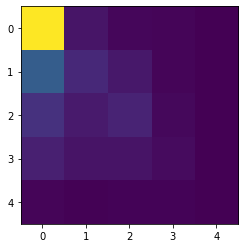

In [19]:
model2 = RandomForestClassifier(max_depth=40, random_state=0)
model2.fit(X_train, y_train)

y_pred2 = prediction(X_test, model2)
cm2, acc2 = cal_accuracy(y_test, y_pred2)

plt.imshow(cm2)

Predicted values:
[1 0 0 ... 0 0 0]
Accuracy :  57.26849979781642
Report :                precision    recall  f1-score   support

           0       0.63      0.94      0.75      4924
           1       0.40      0.21      0.27      2235
           2       0.43      0.29      0.34      1512
           3       0.37      0.13      0.19      1021
           4       0.00      0.00      0.00       200

    accuracy                           0.57      9892
   macro avg       0.37      0.31      0.31      9892
weighted avg       0.51      0.57      0.51      9892



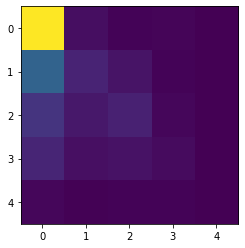

In [20]:
model3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
...     max_depth=1, random_state=0)
model3.fit(X_train, y_train)

y_pred3 = prediction(X_test, model3)
cm3, acc3 = cal_accuracy(y_test, y_pred3)

plt.imshow(cm3)